Steps for building a machine learning model:
1. Gaining the understanding of the project and what it is about
2. Import libraries (atleast initial ones)
3. Import the data/ Get the data
4. Data cleaning and understanding
5. EDA: Exploratory data analysis
   Univariate analysis - to look at the distribution in order to understand if there is an outlier present in the data
   Bi-variate analysis - When we look at the relationship between two variables (Typically between the target variable (Selling price in this case and all the other variables)
   Multi-variate analysis - to check correlation between all the combination of features

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [6]:
data = pd.read_csv('Cardekho.csv')
data.head()


,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [5]:
# Basic data checks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [8]:
data.shape

(15411, 13)

In [9]:
# Summary statistics
data.describe()

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [20]:
data['fuel_type'].value_counts(normalize = True)*100

fuel_type
Petrol      49.594446
Diesel      48.140938
CNG          1.953150
LPG          0.285510
Electric     0.025955
Name: proportion, dtype: float64

In [21]:
data['fuel_type'].value_counts()


fuel_type
Petrol      7643
Diesel      7419
CNG          301
LPG           44
Electric       4
Name: count, dtype: int64

In [22]:
data['mileage'].mean()

19.70115112581922

<Axes: xlabel='mileage', ylabel='Density'>

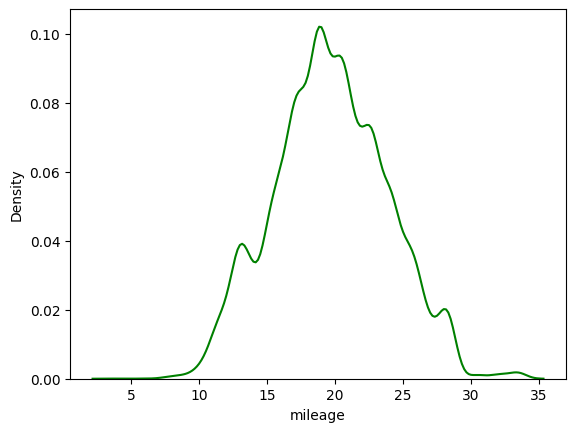

In [27]:
sns.kdeplot(x = data['mileage'],color = 'g')

<Axes: xlabel='seats', ylabel='Density'>

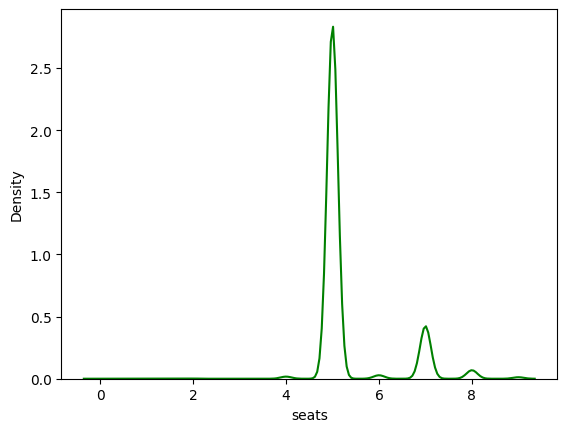

In [28]:
sns.kdeplot(x = data['seats'],color = 'g')

In [29]:
data['seats'].value_counts()

seats
5    12910
7     1922
8      311
6      127
4       77
9       55
2        7
0        2
Name: count, dtype: int64

<Axes: xlabel='max_power', ylabel='Density'>

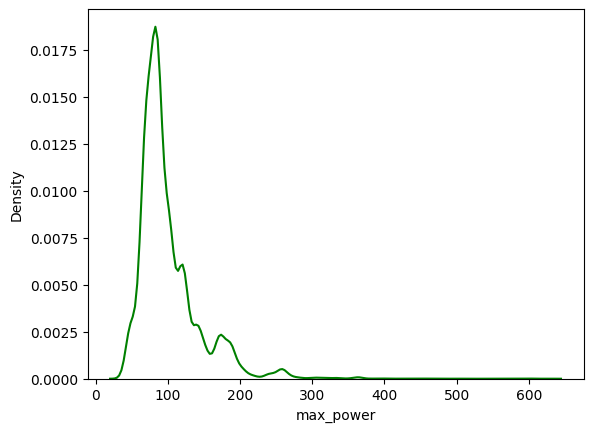

In [30]:
sns.kdeplot(x = data['max_power'],color = 'g')

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
1172,Bentley Continental,Bentley,Continental,9,9000,Dealer,Petrol,Automatic,9.50,5998,626.0,4,14500000
1209,Porsche Cayenne,Porsche,Cayenne,4,36000,Dealer,Petrol,Automatic,12.50,3604,420.0,5,7800000
3799,Ferrari GTC4Lusso,Ferrari,GTC4Lusso,2,3800,Dealer,Petrol,Automatic,4.00,3855,601.0,4,39500000
9190,Porsche Cayenne,Porsche,Cayenne,12,126000,Individual,Petrol,Automatic,8.50,4806,500.0,5,2000000
9364,Porsche Cayenne,Porsche,Cayenne,4,24000,Dealer,Petrol,Automatic,12.50,3604,440.0,5,11100000
9450,BMW 6,BMW,6,12,65000,Dealer,Petrol,Automatic,7.94,4395,450.0,4,1500000
9722,Mercedes-Benz S-Class,Mercedes-Benz,S-Class,3,4000,Dealer,Petrol,Automatic,7.81,4663,459.0,4,13000000
10040,Bentley Continental,Bentley,Continental,9,37500,Dealer,Petrol,Automatic,6.00,5998,600.0,5,5200000
10969,Rolls-Royce Ghost,Rolls-Royce,Ghost,4,5000,Individual,Petrol,Automatic,10.20,6592,563.0,4,24200000
12067,BMW 7,BMW,7,11,64000,Dealer,Petrol,Automatic,8.77,4395,402.0,5,1499000


<Axes: xlabel='seller_type', ylabel='count'>

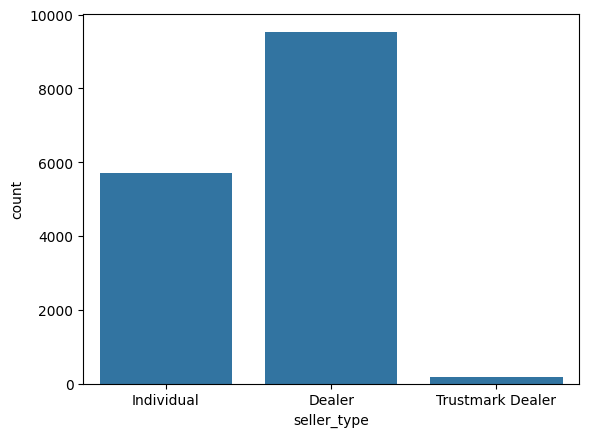

In [36]:
sns.countplot(x = data['seller_type'])

In [ ]:
Please do this for all the categorical columns
and then tell me the insights that you are getting by the graphs (Atleast 2 insights)
Bi-variate analysis - When we look at the relationship between each column and the selling price

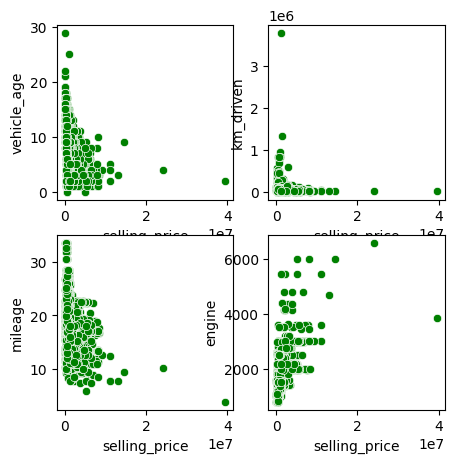

In [46]:
#Lets look at the relationship of each variable with the selling price (Target variable)

fig = plt.figure(figsize = (5,5))

features = ['vehicle_age','km_driven','mileage','engine']

for i in range(len(features)):
    plt.subplot(2,2,i+1)
    sns.scatterplot(data = data, x = 'selling_price',y = features[i],color = 'g')


<Axes: xlabel='selling_price', ylabel='mileage'>

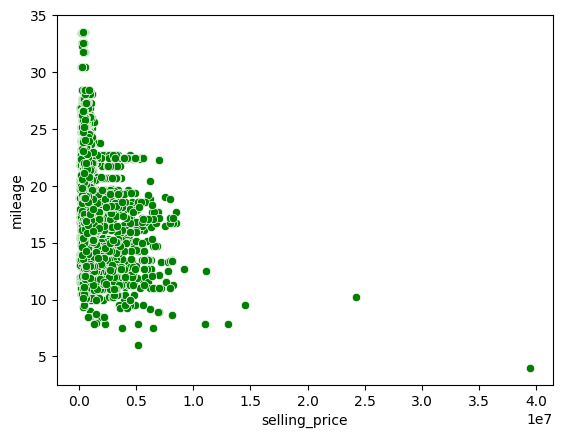

In [39]:
sns.scatterplot(data = data, x = 'selling_price',y = 'mileage',color = 'g')
Insights:
Vehicle age, Km_driven, mileage are impacting the selling_price negatively

Engine, max_power will impact the selling_price positively

<Axes: xlabel='selling_price', ylabel='max_power'>

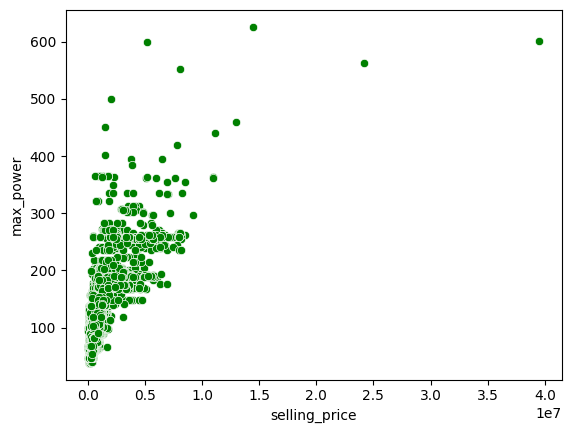

In [40]:
sns.scatterplot(data = data, x = 'selling_price',y = 'max_power',color = 'g')

In [48]:
#Multi-variate analysis - to check correlation between all the combination of numerical features

features = ['vehicle_age','km_driven','mileage','engine','max_power','seats','selling_price']

data[features].corr()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
vehicle_age,1.000000,0.333891,-0.257394,0.098965,0.005208,0.030791,-0.241851
km_driven,0.333891,1.000000,-0.105239,0.192885,0.044421,0.192830,-0.080030
mileage,-0.257394,-0.105239,1.000000,-0.632987,-0.533128,-0.440280,-0.305549
engine,0.098965,0.192885,-0.632987,1.000000,0.807368,0.551236,0.585844
max_power,0.005208,0.044421,-0.533128,0.807368,1.000000,0.172257,0.750236
seats,0.030791,0.192830,-0.440280,0.551236,0.172257,1.000000,0.115033
selling_price,-0.241851,-0.080030,-0.305549,0.585844,0.750236,0.115033,1.000000


<Axes: >

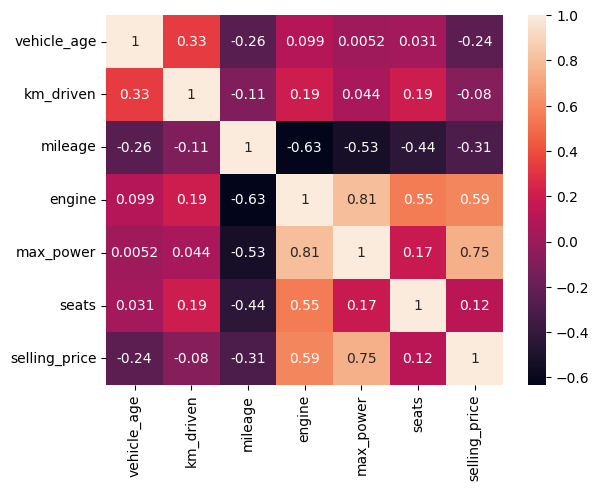

In [50]:
sns.heatmap(data= data[features].corr(),annot = True)

In [9]:
data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [10]:
model_data = data.copy()
model_data.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [11]:
model_data.drop(labels = ['car_name','brand','model','seller_type'],axis = 1, inplace = True)
model_data

,vehicle_age,km_driven,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,9,120000,Petrol,Manual,19.70,796,46.30,5,120000
1,5,20000,Petrol,Manual,18.90,1197,82.00,5,550000
2,11,60000,Petrol,Manual,17.00,1197,80.00,5,215000
3,9,37000,Petrol,Manual,20.92,998,67.10,5,226000
4,6,30000,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...
15406,9,10723,Petrol,Manual,19.81,1086,68.05,5,250000
15407,2,18000,Petrol,Manual,17.50,1373,91.10,7,925000
15408,6,67000,Diesel,Manual,21.14,1498,103.52,5,425000
15409,5,3800000,Diesel,Manual,16.00,2179,140.00,7,1225000


In [12]:
model_data = pd.get_dummies(model_data,dtype = float)
model_data

,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price,fuel_type_CNG,fuel_type_Diesel,fuel_type_Electric,fuel_type_LPG,fuel_type_Petrol,transmission_type_Automatic,transmission_type_Manual
0,9,120000,19.70,796,46.30,5,120000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,5,20000,18.90,1197,82.00,5,550000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,11,60000,17.00,1197,80.00,5,215000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,9,37000,20.92,998,67.10,5,226000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,6,30000,22.77,1498,98.59,5,570000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,9,10723,19.81,1086,68.05,5,250000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15407,2,18000,17.50,1373,91.10,7,925000,0.0,0.0,0.0,0.0,1.0,0.0,1.0
15408,6,67000,21.14,1498,103.52,5,425000,0.0,1.0,0.0,0.0,0.0,0.0,1.0
15409,5,3800000,16.00,2179,140.00,7,1225000,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [15]:
"""Linear regression - Modelling

Y (Target variable) = m1x1 + m2x2 + m3x3 ............

We will drop selling_price from independent variable"""

X = model_data.drop('selling_price', axis = 1)

# For getting the target variable we will just have selling_price

Y = model_data['selling_price']
Y




0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
15406     250000
15407     925000
15408     425000
15409    1225000
15410    1200000
Name: selling_price, Length: 15411, dtype: int64

In [21]:
# To divide the data into Train and Test 

train_X, test_X,train_Y,test_Y = train_test_split(X,Y,test_size = 0.2)

# 80% of the data goes to training and 20% of the data goes to testing


In [23]:
# Applying regression for training the model
Regressor = LinearRegression().fit(train_X,train_Y)


LinearRegression()

In [25]:
# Getting the predictions
prediction = Regressor.predict(test_X)

print(prediction)

print(test_Y)


[ 480363.99089872  662886.03697231  930258.3021256  ...  278382.13205013
  123003.05006804 1191035.08103597]
4918      645000
5529      795000
8196      425000
1506      680000
12859     350000
          ...   
1832      500000
3892     1950000
12029     350000
2000      350000
13768     800000
Name: selling_price, Length: 3083, dtype: int64


In [33]:
test_X['predicted_sales_price'] = prediction

test_X['Actual_price'] = test_Y

test_X['difference'] = test_X['predicted_sales_price'] - test_X['Actual_price']

test_X

mse = []
mse.append(mean_squared_error(y_true = test_Y,y_pred = prediction))

rmse = []
rmse.append(np.sqrt(mse))

rmse


[array([434494.78622373])]